- Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 


from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from pydataset import data
import evaluate
import acquire

1. Load the tips dataset from either pydataset or seaborn.



In [2]:
tips = data("tips")

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.
- Here is some sample code to get you started:

`from statsmodels.formula.api import ols`

`model = ols('y ~ x', data=df).fit()`

`predictions = model.predict(df.x)`

The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset.

In [3]:
from statsmodels.formula.api import ols
# OLS = oridinary least square

model = ols('total_bill ~ tip', data=tips).fit()

tips['yhat'] = model.predict(tips.tip)

In [4]:
yhat = tips.yhat

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,11.141475
2,10.34,1.66,Male,No,Sun,Dinner,3,13.967489
3,21.01,3.50,Male,No,Sun,Dinner,3,21.967283
4,23.68,3.31,Male,No,Sun,Dinner,2,21.141218
5,24.59,3.61,Female,No,Sun,Dinner,4,22.445532


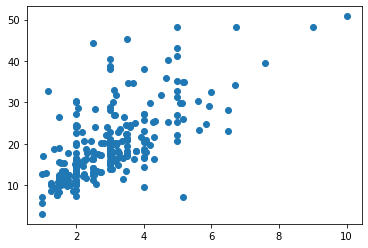

In [6]:
plt.scatter(tips.tip, tips.total_bill)

In [7]:
total_bill = tips.total_bill

In [8]:
tips['baseline'] = tips.total_bill.mean()
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,11.141475,19.785943
2,10.34,1.66,Male,No,Sun,Dinner,3,13.967489,19.785943
3,21.01,3.50,Male,No,Sun,Dinner,3,21.967283,19.785943
4,23.68,3.31,Male,No,Sun,Dinner,2,21.141218,19.785943
5,24.59,3.61,Female,No,Sun,Dinner,4,22.445532,19.785943


Text(0.5, 1.0, 'Baseline and OLS regression model')

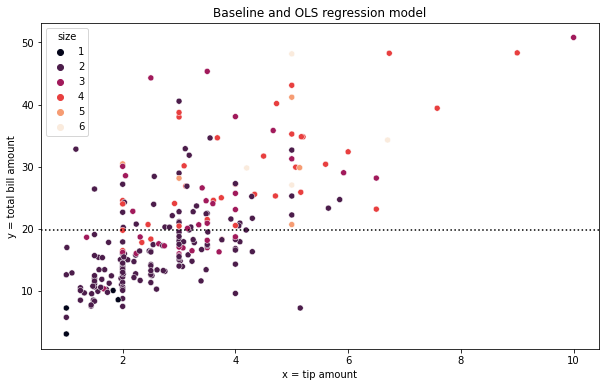

In [9]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='tip',y='total_bill',data=tips, palette='rocket', hue='size')
plt.axhline(tips.total_bill.mean(), ls = ':', color='black')
plt.xlabel('x = tip amount')
plt.ylabel('y = total bill amount')
plt.title('Baseline and OLS regression model')

Text(0.5, 1.0, 'Baseline and OLS regression model')

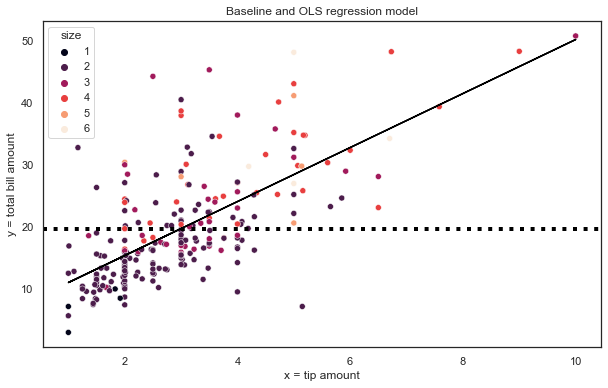

In [41]:
plt.figure(figsize = (10,6))
sns.set(style="white")
sns.scatterplot(x='tip',y='total_bill',data=tips, palette='rocket', hue='size')
plt.axhline(y = total_bill.mean(), ls = ':', color='black', linewidth=4)
plt.plot(tips.tip, tips.yhat, color='black')
plt.xlabel('x = tip amount')
plt.ylabel('y = total bill amount')
plt.title('Baseline and OLS regression model')

3. Plot the residuals for the linear regression model that you made.



In [11]:
tips['residual'] = tips.total_bill - tips.yhat
tips['baseline_residual'] = tips.total_bill - tips.baseline
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,11.141475,19.785943,5.848525,-2.795943
2,10.34,1.66,Male,No,Sun,Dinner,3,13.967489,19.785943,-3.627489,-9.445943
3,21.01,3.50,Male,No,Sun,Dinner,3,21.967283,19.785943,-0.957283,1.224057
4,23.68,3.31,Male,No,Sun,Dinner,2,21.141218,19.785943,2.538782,3.894057
5,24.59,3.61,Female,No,Sun,Dinner,4,22.445532,19.785943,2.144468,4.804057


In [12]:
tips.residual.sum()

-9.450218385609332e-13

In [13]:
tips.baseline_residual.sum()

-1.0444978215673473e-12

Text(0.5, 1.0, 'Baseline Residuals')

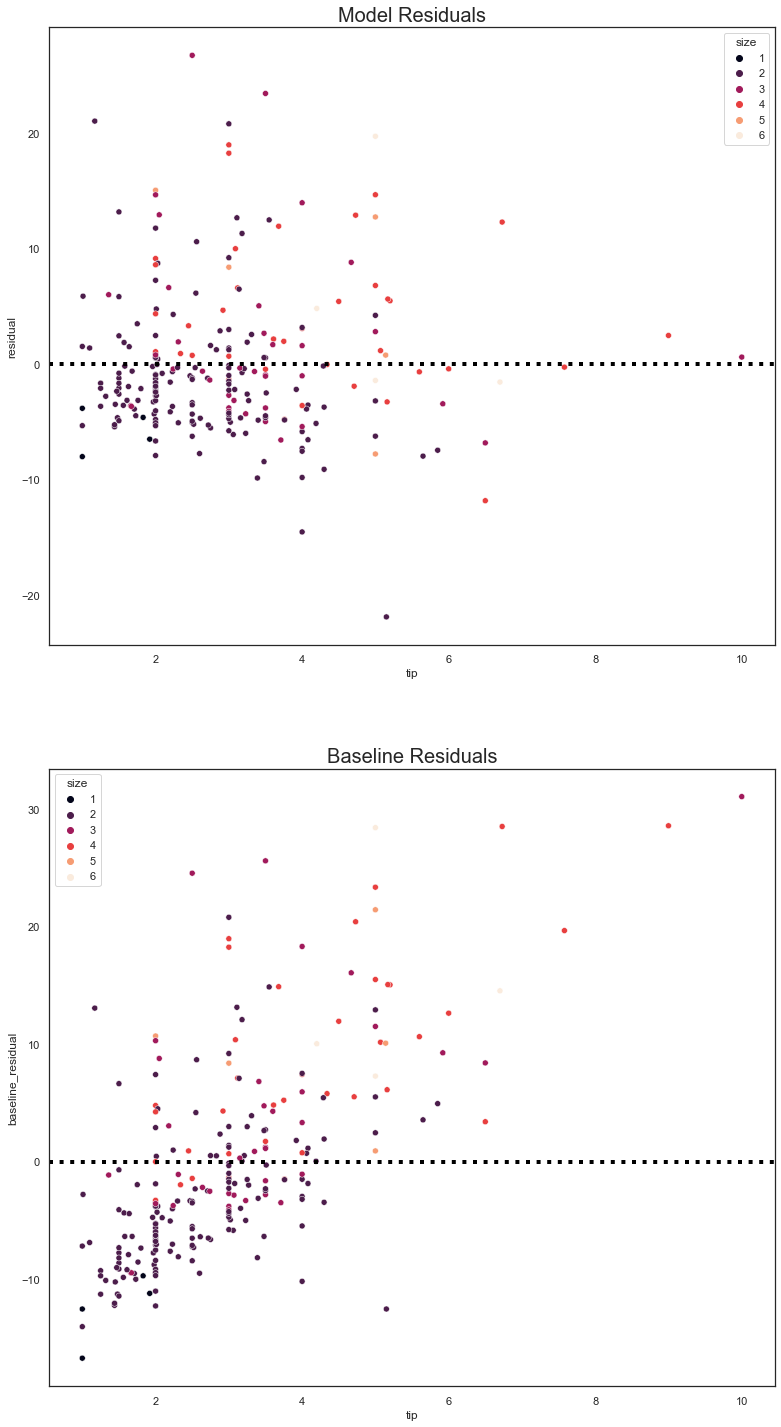

In [45]:
plt.subplots(2, 1, figsize=(13,25), sharey=True)

plt.subplot(2,1,1)
sns.set(style="white")
sns.scatterplot(x='tip',y='residual',data=tips, palette='rocket', hue='size')
plt.axhline(y = 0, ls = ':', color='black', linewidth=4)
plt.title('Model Residuals',fontsize = 20)
    
plt.subplot(2,1,2)
sns.set(style="white")
sns.scatterplot(x='tip',y='baseline_residual',data=tips,palette='rocket', hue='size')
plt.axhline(y = 0, ls = ':', color='black', linewidth=4)
plt.title('Baseline Residuals',fontsize = 20)

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.



#### MAE

In [15]:
# average of absolute values of residuals
MAE = abs(tips.residual).sum()

MAE_baseline = abs(tips.baseline_residual).sum()
# my model is better than my baseline

#### SSE

In [16]:
tips['residual_sqr'] = tips.residual ** 2
tips['baseline_residual_sqr'] =  tips.baseline_residual ** 2
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual,residual_sqr,baseline_residual_sqr
1,16.99,1.01,Female,No,Sun,Dinner,2,11.141475,19.785943,5.848525,-2.795943,34.205243,7.817295
2,10.34,1.66,Male,No,Sun,Dinner,3,13.967489,19.785943,-3.627489,-9.445943,13.158679,89.225832
3,21.01,3.50,Male,No,Sun,Dinner,3,21.967283,19.785943,-0.957283,1.224057,0.916392,1.498316
4,23.68,3.31,Male,No,Sun,Dinner,2,21.141218,19.785943,2.538782,3.894057,6.445415,15.163683
5,24.59,3.61,Female,No,Sun,Dinner,4,22.445532,19.785943,2.144468,4.804057,4.598743,23.078967


In [17]:
SSE = tips['residual_sqr'].sum()
SSE_baseline =  tips['baseline_residual_sqr'].sum()

#### MSE

In [18]:
MSE = SSE / len(tips)
MSE_baseline = SSE_baseline / len(tips)

#### RMSE

In [19]:
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

In [20]:
print("My Mean Absoute Error Values are:")
print(" ")
print("MAE = ", MAE)
print("MAE Baseline = ", MAE_baseline)
print("----------------------------------------------")
print("My Sum of Square Error Values are:")
print(" ")
print("SSE = ", SSE)
print("SSE Baseline = ", SSE_baseline)
print("----------------------------------------------")
print("My Mean of Square Error Values are:")
print(" ")
print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)
print("----------------------------------------------")
print("My Root Mean of Square Error Values are:")
print(" ")
print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

My Mean Absoute Error Values are:
 
MAE =  1152.4782140209504
MAE Baseline =  1676.1433606557378
----------------------------------------------
My Sum of Square Error Values are:
 
SSE =  10464.729955151068
SSE Baseline =  19258.46408319672
----------------------------------------------
My Mean of Square Error Values are:
 
MSE =  42.88823752111093
MSE baseline =  78.92813148851114
----------------------------------------------
My Root Mean of Square Error Values are:
 
RMSE =  6.548911170653556
RMSE baseline =  8.884150577771132


5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).




#### MSE2

In [21]:
MSE2 = mean_squared_error(tips.total_bill, tips.yhat)
MSE2_baseline = mean_squared_error(tips.total_bill, tips.baseline)

#### SSE2

In [22]:
SSE2 = MSE2 * len(tips)
SSE2_baseline = MSE2_baseline * len(tips)

#### RMSE2

In [23]:
RMSE2 = mean_squared_error(tips.total_bill, tips.yhat, squared = False)
RMSE2_baseline = mean_squared_error(tips.total_bill, tips.baseline, squared = False)

In [24]:
print("My Sum of Square Error Values for Second Run are:")
print(" ")
print("SSE2", SSE2) 
print("SSE2 baseline" ,SSE2_baseline) 
print("----------------------------------------------")
print("My Mean of Square Error Values for Second Run are:")
print(" ")
print("MSE2", MSE2) 
print("MSE2 baseline" ,MSE2_baseline)
print("----------------------------------------------")
print("My Root Mean of Square Error Values for Second Run are:")
print(" ")
print("RMSE2", RMSE2) 
print("RMSE2 baseline" ,RMSE2_baseline)  

My Sum of Square Error Values for Second Run are:
 
SSE2 10464.729955151068
SSE2 baseline 19258.46408319672
----------------------------------------------
My Mean of Square Error Values for Second Run are:
 
MSE2 42.88823752111093
MSE2 baseline 78.92813148851114
----------------------------------------------
My Root Mean of Square Error Values for Second Run are:
 
RMSE2 6.548911170653556
RMSE2 baseline 8.884150577771132


In [25]:
mean_absolute_error(tips.total_bill, tips.yhat)

4.723271368938321

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model. (R square)



In [26]:
TSS = SSE_baseline =  tips['baseline_residual_sqr'].sum()

In [27]:
SSE = tips['residual_sqr'].sum()

In [28]:
ESS = TSS - SSE

In [29]:
R2 = ESS/TSS

In [30]:
print("My Total Sum of Square is:")
print(" ")
print(TSS) 
print("----------------------------------------------")
print("My Sum of squared error is:")
print(" ")
print(SSE) 
print("----------------------------------------------")
print("My Explained sum of squares is:")
print(" ")
print(ESS) 
print("----------------------------------------------")
print("My Calculate R2 is:")
print(" ")
print(R2) 

My Total Sum of Square is:
 
19258.46408319672
----------------------------------------------
My Sum of squared error is:
 
10464.729955151068
----------------------------------------------
My Explained sum of squares is:
 
8793.734128045651
----------------------------------------------
My Calculate R2 is:
 
0.4566165863516763


7. What is the amount of variance explained in your model?



In [31]:
# sklearn.metrics.explained_variance_score

# sklearn.metrics.explained_variance_score

evs = explained_variance_score(tips.total_bill, tips.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


8. Is your model significantly better than the baseline model?



Not at all!!!

9. Create a file named evaluate.py that contains the following functions.



All done

In [32]:
def clean_tips():
    '''Takes in tips database from pydataset
    fit model
    predict
    add columns:
        yhat
        residual
        baseline_residual'''
    tips = data("tips")
    model = ols('total_bill ~ tip', data=tips).fit()
    tips['yhat'] = model.predict(tips.tip)
    yhat = tips.yhat
    tips['residual'] = tips.total_bill - tips.yhat
    tips['baseline_residual'] = tips.total_bill - tips.baseline
    return tips
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,baseline,residual,baseline_residual,residual_sqr,baseline_residual_sqr
1,16.99,1.01,Female,No,Sun,Dinner,2,11.141475,19.785943,5.848525,-2.795943,34.205243,7.817295
2,10.34,1.66,Male,No,Sun,Dinner,3,13.967489,19.785943,-3.627489,-9.445943,13.158679,89.225832
3,21.01,3.50,Male,No,Sun,Dinner,3,21.967283,19.785943,-0.957283,1.224057,0.916392,1.498316
4,23.68,3.31,Male,No,Sun,Dinner,2,21.141218,19.785943,2.538782,3.894057,6.445415,15.163683
5,24.59,3.61,Female,No,Sun,Dinner,4,22.445532,19.785943,2.144468,4.804057,4.598743,23.078967


a. plot_residuals(y, yhat): creates a residual plot



In [33]:
import evaluate

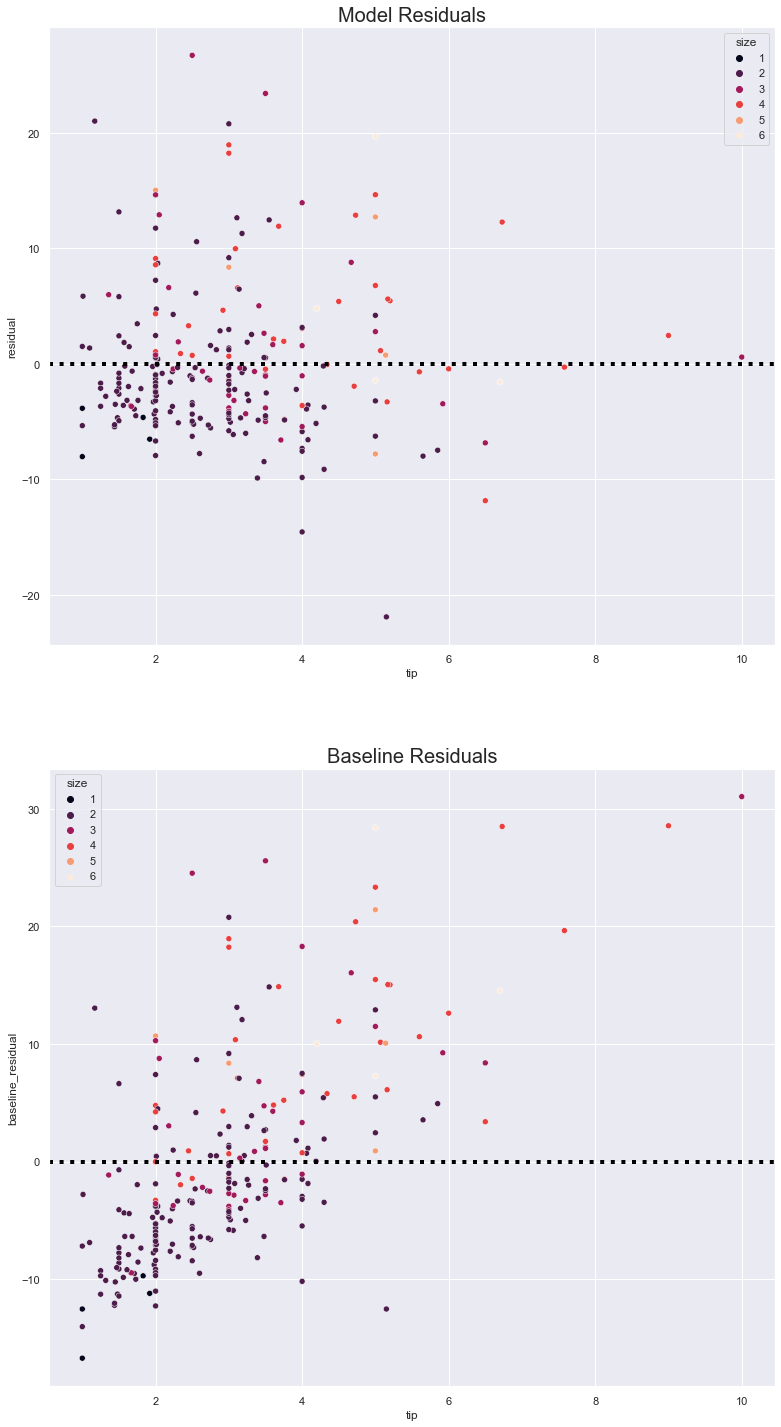

In [34]:
res_eval = evaluate.plot_residuals()
res_eval

b. regression_errors(y, yhat): returns the following values:



In [35]:
error_eval = evaluate.regression_errors()
error_eval

My Sum of squared error is:
 
10464.729955151068
----------------------------------------------
My Total Sum of Square is:
 
19258.46408319672
----------------------------------------------
My Explained sum of squares is:
 
8793.734128045651
----------------------------------------------
My Mean of Square Error Values are:
 
42.88823752111093
----------------------------------------------
My Root Mean of Square Error Values are:
 
6.548911170653556


c. baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model



In [36]:
baseline_eval = evaluate.baseline_mean_errors()
baseline_eval

Baseline of Sum of Square Error Values are:
 
19258.46408319672
----------------------------------------------
Baseline of Mean of Square Error Values is:
 
78.92813148851114
----------------------------------------------
Baseline of Root Mean of Square Error Values is:
 
8.884150577771132


d. better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false



In [37]:
model_eval = evaluate.better_than_baseline()
model_eval

False

e. model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.